<a href="https://colab.research.google.com/github/14Fabyzz/prediccion-tarifa-energia/blob/main/EnergyProyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#paso 1: Importar libreria
#from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# Paso 3: Leer el archivo CSV usando pandas
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/bootcamp/datosedepDf.csv")
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Año,Mes,Clase de Servicio,Todo Consumo
0,2014.0,Enero,Estrato1,360.03958
1,2014.0,Enero,Estrato2,360.03958
2,2014.0,Enero,Estrato3,360.03958
3,2014.0,Enero,Estrato4,360.03958
4,2014.0,Enero,Estrato5,432.04750
5,2014.0,Enero,Estrato6,432.04750
6,2014.0,Enero,Comercial / Industrial,432.04750
7,2014.0,Enero,Oficial / Especial,360.03958
8,2014.0,Enero,Provisional,432.04750
9,2014.0,Febrero,Estrato1,360.03958


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                1230 non-null   float64
 1   Mes                1231 non-null   object 
 2   Clase de Servicio  1231 non-null   object 
 3   Todo Consumo       1230 non-null   float64
dtypes: float64(2), object(2)
memory usage: 38.7+ KB


In [ ]:
# Estadísticas básicas
#print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

#borrar los nulos
df = df.dropna()


Año                  0
Mes                  0
Clase de Servicio    0
Tarifa_kWh           0
Numero_Mes           0
dtype: int64


In [ ]:
df = df.rename(columns={'Todo Consumo': 'Tarifa_kWh'})


#año a entero
df['Año'] = df['Año'].astype(int)

# Crear columna de Número de Mes
mes_a_numero = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

df['Numero_Mes'] = df['Mes'].map(mes_a_numero)


In [ ]:
# 1. Limpieza inicial del texto
clase_clean = df['Clase de Servicio'].str.lower().str.strip()

# 2. Diccionario de mapeo
service_map = {
    'estrato1': 1,
    'estrato2': 2,
    'estrato3': 3,
    'estrato4': 4,
    'estrato5': 5,
    'estrato6': 6,
    'comercial / industrial': 7,
    'oficial / especial': 8,
    'provisional': 9
}

# 3. Aplicar el mapeo
df['numero_clase_servicio'] = clase_clean.map(service_map)
print(df.isnull().sum())

Año                      0
Mes                      0
Clase de Servicio        0
Tarifa_kWh               0
Numero_Mes               0
Fecha                    0
numero_clase_servicio    0
dtype: int64


In [ ]:
print(df.groupby('Año')['Tarifa_kWh'].mean())


Año
2014     414.387502
2015     436.824915
2016     534.373762
2017     533.991569
2018     555.713611
2019     582.384093
2020     634.177326
2021     666.664927
2022     764.528187
2023     894.731430
2024    1058.748836
2025    1073.990889
Name: Tarifa_kWh, dtype: float64


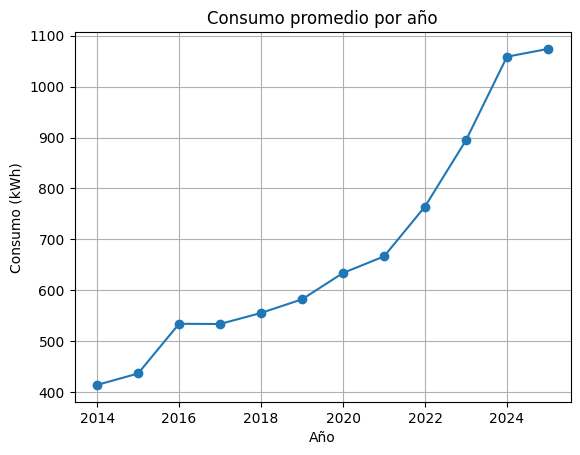

In [ ]:
# Agrupar por año y sacar el promedio del consumo
df.groupby('Año')['Tarifa_kWh'].mean().plot(marker='o', title='Consumo promedio por año')
plt.ylabel('Consumo (kWh)')
plt.grid(True)
plt.show()


In [ ]:
display(df)

,Año,Mes,Clase de Servicio,Tarifa_kWh,Numero_Mes,Fecha,numero_clase_servicio
0,2014,Enero,Estrato1,360.03958,1,2014-01-01,1
1,2014,Enero,Estrato2,360.03958,1,2014-01-01,2
2,2014,Enero,Estrato3,360.03958,1,2014-01-01,3
3,2014,Enero,Estrato4,360.03958,1,2014-01-01,4
4,2014,Enero,Estrato5,432.04750,1,2014-01-01,5
...,...,...,...,...,...,...,...
1226,2025,Mayo,Estrato5,1161.95000,5,2025-05-01,5
1227,2025,Mayo,Estrato6,1161.95000,5,2025-05-01,6
1228,2025,Mayo,Comercial / Industrial,1161.95000,5,2025-05-01,7
1229,2025,Mayo,Oficial / Especial,968.29000,5,2025-05-01,8


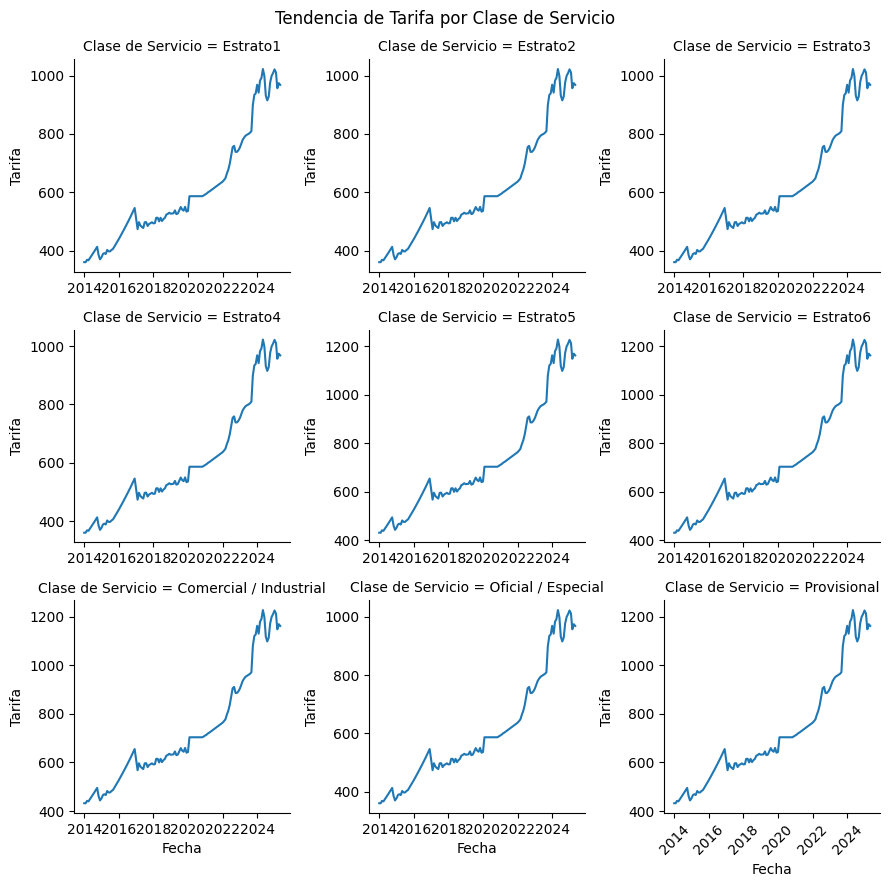

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas to use pd.to_datetime

# Assuming 'Año' and 'Numero_Mes' columns exist in your DataFrame
# Create a 'Fecha' column by combining 'Año' and 'Numero_Mes'
# You'll also need a day. Since your data seems to be monthly, we can use the first day of the month.
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Numero_Mes'].astype(str) + '-01')


# Sort the DataFrame by date
df_sorted = df.sort_values('Fecha')

# Create the FacetGrid
g = sns.FacetGrid(df_sorted, col='Clase de Servicio', col_wrap=3, height=3, sharey=False)

# Map the line plot to the FacetGrid
g.map_dataframe(sns.lineplot, x='Fecha', y='Tarifa_kWh')

# Customize the axes
for ax in g.axes.ravel():
    ax.tick_params(labelbottom=True)
    ax.set_xlabel('Fecha') # Set xlabel here
    ax.set_ylabel('Tarifa') # Set ylabel here

# Adjust layout and add a title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Tendencia de Tarifa por Clase de Servicio')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure a tight layout
plt.tight_layout()

# Show the plot
plt.show()

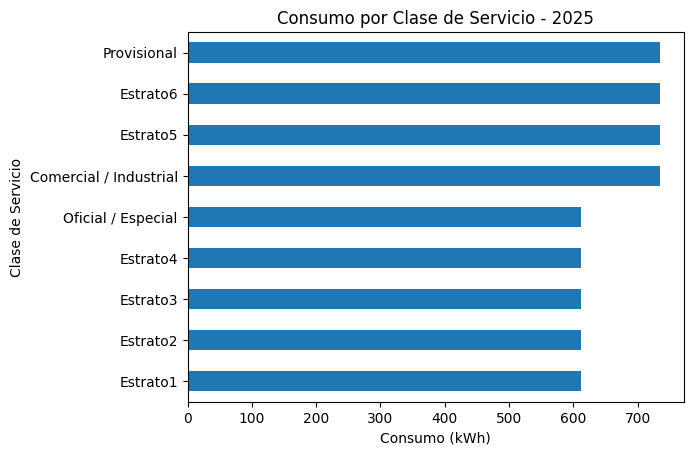

In [ ]:
#. Consumo por clase de servicio en un año específico
df[df['Año'] == 2021].groupby('Clase de Servicio')['Tarifa_kWh'].mean().sort_values().plot(kind='barh', title='Consumo por Clase de Servicio - 2025')
plt.xlabel('Consumo (kWh)')
plt.show()

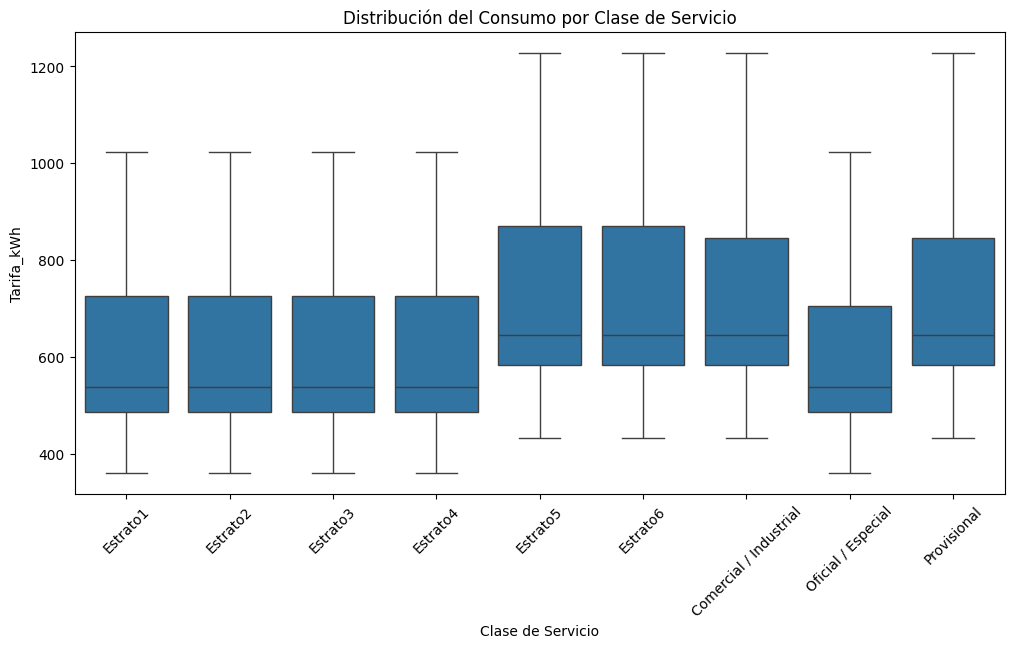

In [ ]:
# Boxplot de consumo mensual por tipo de servicio
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Clase de Servicio', y='Tarifa_kWh')
plt.xticks(rotation=45)
plt.title('Distribución del Consumo por Clase de Servicio')
plt.show()

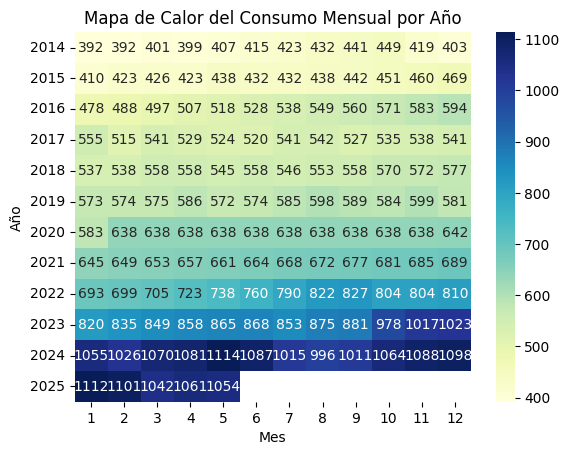

In [ ]:
# Calorimetría (heatmap) del consumo por mes y año
pivot = df.pivot_table(values='Tarifa_kWh', index='Año', columns='Numero_Mes', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Mapa de Calor del Consumo Mensual por Año')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()

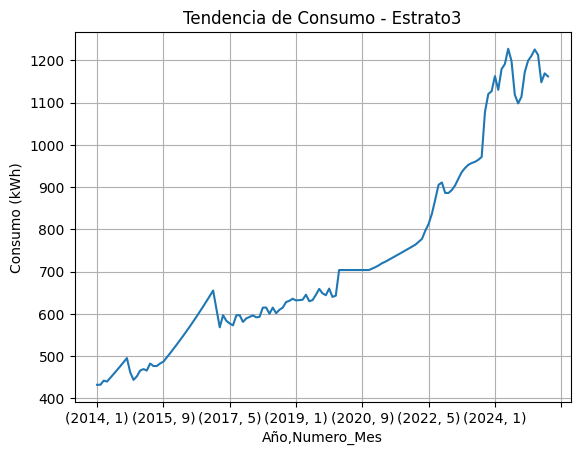

In [ ]:
#Tendencia de consumo para un servicio específico
df[df['Clase de Servicio'] == 'Estrato5'].groupby(['Año', 'Numero_Mes'])['Tarifa_kWh'].mean().plot(title='Tendencia de Consumo - Estrato3')
plt.ylabel('Consumo (kWh)')
plt.grid(True)
plt.show()

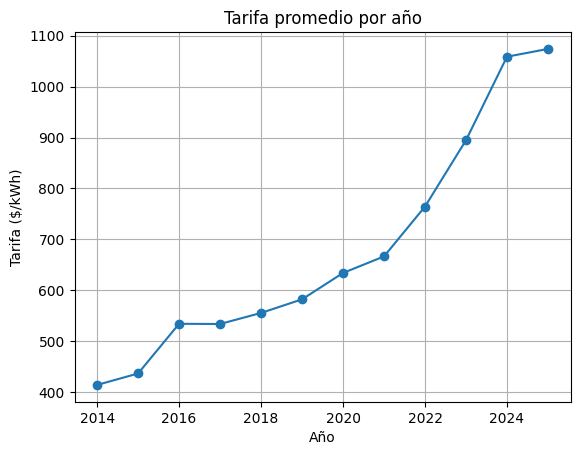

In [ ]:
# Promedio de tarifa por año
df.groupby('Año')['Tarifa_kWh'].mean().plot(marker='o', title='Tarifa promedio por año')
plt.ylabel('Tarifa ($/kWh)')
plt.grid(True)
plt.show()

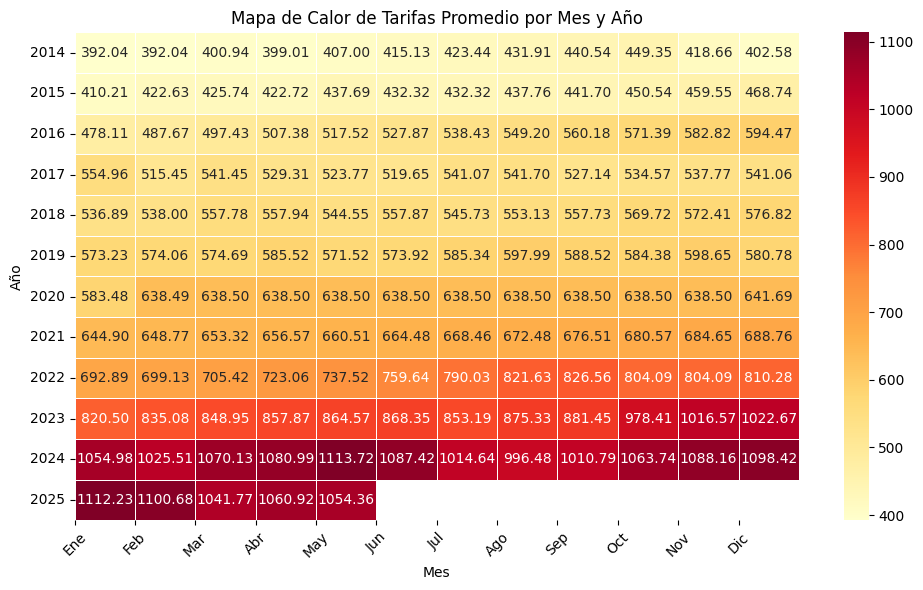

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear tabla dinámica (pivot table)
pivot = df.pivot_table(
    values='Tarifa_kWh',
    index='Año',
    columns='Numero_Mes',
    aggfunc='mean'
)

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=0.5)

# Etiquetas y título
plt.title('Mapa de Calor de Tarifas Promedio por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.xticks(ticks=range(12), labels=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


REGRESION LINEAL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Variables predictoras (X) y objetivo (y)
X = df[['Año', 'Numero_Mes', 'numero_clase_servicio']]
y = df['Tarifa_kWh']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir tarifas
y_pred = modelo.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² (coef. de determinación): {r2:.4f}")
print(f"RMSE (error cuadrático medio): {rmse:.2f} $/kWh")

# Mostrar coeficientes
coef = pd.DataFrame({'Variable': X.columns, 'Coeficiente': modelo.coef_})
print("\nCoeficientes del modelo:")
print(coef)

R² (coef. de determinación): 0.8154
RMSE (error cuadrático medio): 90.65 $/kWh

Coeficientes del modelo:
                Variable  Coeficiente
0                    Año    57.799950
1             Numero_Mes     3.689908
2  numero_clase_servicio    14.349998


In [ ]:
pip install gradio


In [ ]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# --- Cargar y preparar datos ---
df = df.rename(columns={'Todo Consumo': 'Tarifa_kWh'})

# Codificar clase de servicio
df['numero_clase_servicio'] = df['Clase de Servicio'].astype('category').cat.codes

# Guardar mapeo clase <-> número
mapa_servicio = dict(enumerate(df['Clase de Servicio'].astype('category').cat.categories))
# También al revés (nombre → número)
servicio_a_codigo = {v: k for k, v in mapa_servicio.items()}

# Variables predictoras y objetivo
X = df[['Año', 'Numero_Mes', 'numero_clase_servicio']]
y = df['Tarifa_kWh']

# Entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# --- Función de predicción ---
def predecir_tarifa(año, mes, clase_nombre):
    clase_codigo = servicio_a_codigo[clase_nombre]  # convertir nombre a número
    entrada = pd.DataFrame([[año, mes, clase_codigo]], columns=['Año', 'Numero_Mes', 'numero_clase_servicio'])
    prediccion = modelo.predict(entrada)[0]
    return f"Tarifa estimada: ${prediccion:.2f} por kWh"

# --- Crear interfaz con dropdown de clases ---
interfaz = gr.Interface(
    fn=predecir_tarifa,
    inputs=[
        gr.Slider(2014, 2025, step=1, label="Año"),
        gr.Slider(1, 12, step=1, label="Mes"),
        gr.Dropdown(choices=list(servicio_a_codigo.keys()), label="Clase de Servicio")
    ],
    outputs="text",
    title="Predicción de Tarifa Eléctrica en Colombia",
    description="Selecciona el año, mes y clase de servicio para predecir la tarifa regulada en $/kWh"
)

interfaz.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://83c4c092bf6b2a9f4d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
